# EDA - 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("BIKE DETAILS.csv")

Q: What is the range of selling prices in the dataset?

In [3]:
print(f"Range is between {df["selling_price"].max()} and {df["selling_price"].min()}")

Range is between 760000 and 5000


Q: What is the median selling price for bikes in the dataset

In [4]:
print(f"Median selling price: {df["selling_price"].median()}")

Median selling price: 45000.0


Q What is the most common seller type?


In [5]:
df["seller_type"].max()

'Individual'

Q: How many bikes have driven more than 50,000 kilometers

In [6]:
len(df[df["km_driven"]>50000])

170

Q: What is the average km_driven value for each ownership type

In [7]:
df.groupby("owner")["km_driven"].mean()

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64

Q: What proportion of bikes are from the year 2015 or older?

In [8]:
len(df[df["year"]>=2015])/len(df)

0.527803958529689

Q: What is the trend of missing values across the dataset

<BarContainer object of 7 artists>

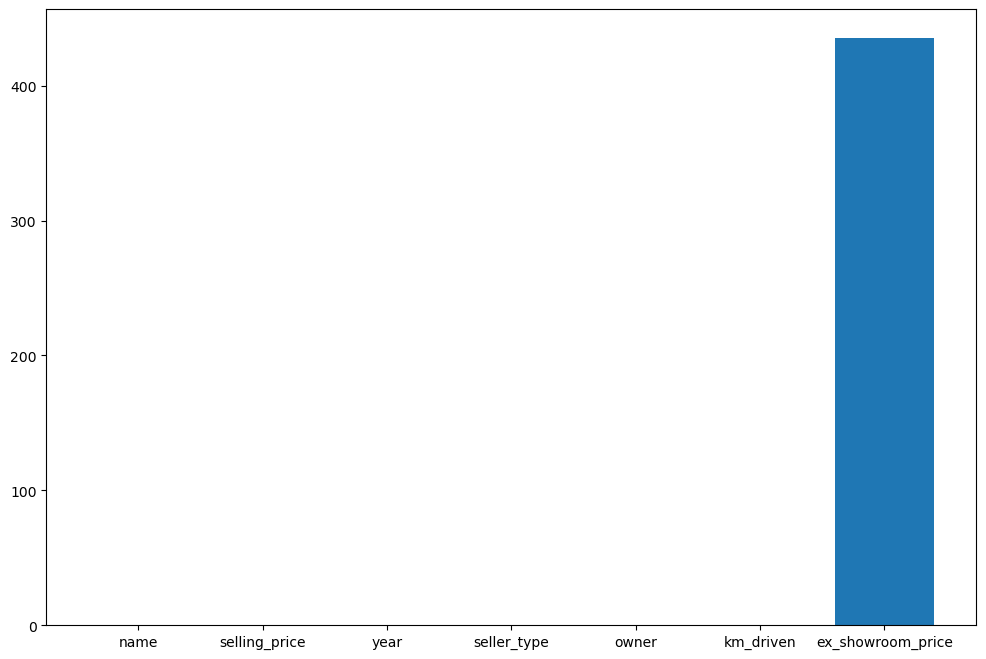

In [9]:
plt.figure(figsize=(12,8))
plt.bar(df.columns.tolist(),df.isnull().sum())

Q: What is the highest ex_showroom_price recorded, and for which bike?

In [10]:
df["name"].iloc[df["ex_showroom_price"].idxmax()]

'Harley-Davidson Street Bob'

Q: What is the total number of bikes listed by each seller type?

In [11]:
df.groupby("seller_type")["seller_type"].count()

seller_type
Dealer           6
Individual    1055
Name: seller_type, dtype: int64

Q: What is the relationship between selling_price and km_driven for first-owner bikes?

In [12]:
sp=df[df["owner"]=="1st owner"]["selling_price"]
km=df[df["owner"]=="1st owner"]["km_driven"]

Text(0, 0.5, 'KM Driven')

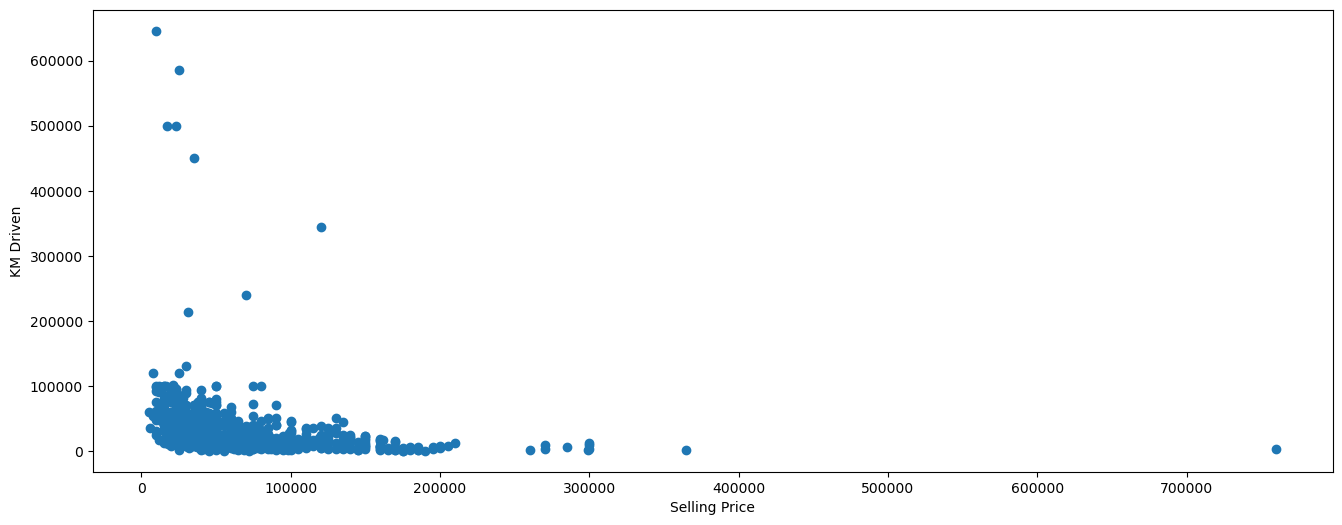

In [13]:
plt.figure(figsize=(16,6))
plt.scatter(sp,km)
plt.xlabel("Selling Price")
plt.ylabel("KM Driven")

Q:  Identify and remove outliers in the km_driven column using the IQR method

In [14]:
Q1=df["km_driven"].quantile(0.25)
Q3=df["km_driven"].quantile(0.75)

IQR=Q3-Q1
lb=Q1-1.5*IQR
ub=Q3+1.5*IQR

no_outliers=df[(df["km_driven"]>=lb) & (df["km_driven"]<=ub)]

Q:  Perform a bivariate analysis to visualize the relationship between year and selling_price

Text(0, 0.5, 'Selling Price')

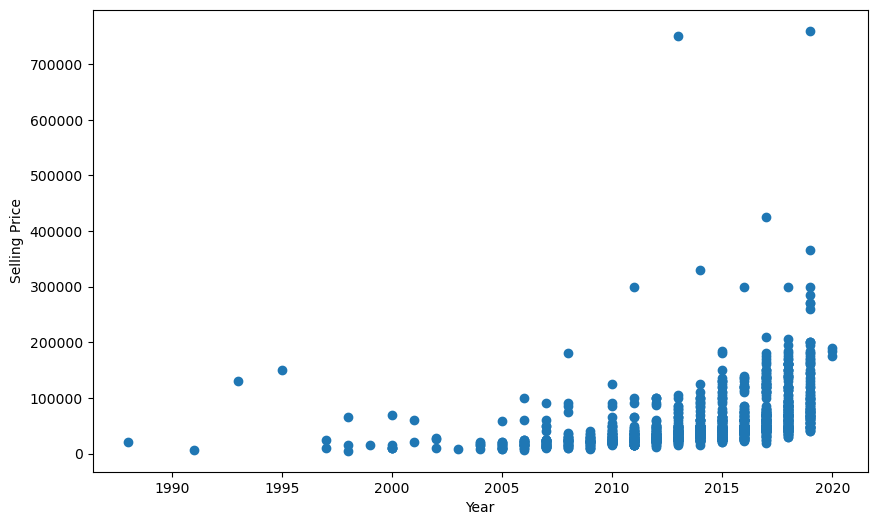

In [15]:
plt.figure(figsize=(10,6))
plt.scatter(df['year'],df["selling_price"])
plt.xlabel("Year")
plt.ylabel("Selling Price")

Q: What is the average depreciation in selling price based on the bike's age (current year - manufacturing
year)

In [16]:
df.dropna(inplace=True)

In [17]:
df["deprecation"]=df["ex_showroom_price"]-df["selling_price"]
df["age"]=2025-df["year"]
avg_dep=df.groupby("age")["deprecation"].mean()
print(avg_dep)

age
5    -34260.000000
6      2954.562500
7     13023.194805
8     22306.082353
9     28328.190476
10    28013.275000
11    34505.606061
12    43086.886792
13    37317.648649
14    47102.666667
15    45658.928571
16    38227.785714
17    54732.428571
18    42399.000000
19    39664.500000
20    44852.000000
21    36852.000000
24    34852.000000
Name: deprecation, dtype: float64


Q: Which bike names are priced significantly above the average price for their manufacturing year

In [18]:
avg_price=df.groupby("year")["selling_price"].mean()
df=df.merge(avg_price, on="year")

In [19]:
df[(df["selling_price_x"]-df["selling_price_y"])>0]["name"]

0      Royal Enfield Classic Gunmetal Grey
1        Yamaha Fazer FI V 2.0 [2016-2018]
8                            Yamaha YZF R3
10                        Yamaha YZF R15 S
11     Royal Enfield Classic Gunmetal Grey
                      ...                 
570                     TVS Apache RTR 160
571                           Hero Extreme
573                     Bajaj Pulsar 220 F
577                    Bajaj Pulsar NS 200
588                 Bajaj Avenger 220 dtsi
Name: name, Length: 187, dtype: object

Q: Develop a correlation matrix for numeric columns and visualize it using a heatmap

<Axes: >

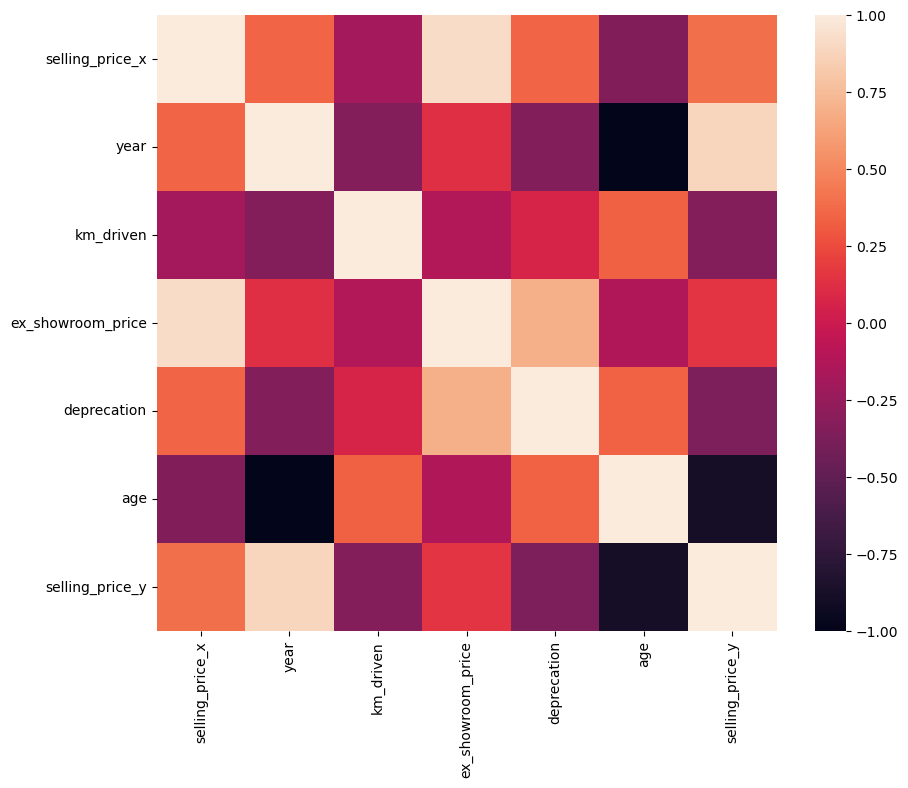

In [20]:
import seaborn as sns

num_cols=df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix=df[num_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix)

# EDA - 2

In [21]:
df1=pd.read_csv("Car Sale.csv")

Q:What is the average selling price of cars for each dealer, and how does it compare across different dealers?

In [22]:
df1.groupby("Dealer_Name")["Price ($)"].mean()

Dealer_Name
Buddy Storbeck's Diesel Service Inc                27217.261563
C & M Motors Inc                                   28111.755200
Capitol KIA                                        28189.703822
Chrysler Plymouth                                  27555.526400
Chrysler of Tri-Cities                             28123.091054
Classic Chevy                                      28602.014446
Clay Johnson Auto Sales                            27816.027113
Diehl Motor CO Inc                                 27993.929487
Enterprise Rent A Car                              28312.580800
Gartner Buick Hyundai Saab                         28247.621019
Hatfield Volkswagen                                27853.712242
Iceberg Rentals                                    28522.958533
McKinney Dodge Chrysler Jeep                       27684.096979
Motor Vehicle Branch Office                        27956.739617
Nebo Chevrolet                                     27818.889415
New Castle Ford Lincoln Merc

Q: Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing
trends?

In [23]:
df1.groupby("Company")["Price ($)"].std().sort_values(ascending=False).idxmax()

'Lincoln'

Q: What is the distribution of car prices for each transmission type, and how do the interquartile ranges
compare?

Text(0, 0.5, 'Price')

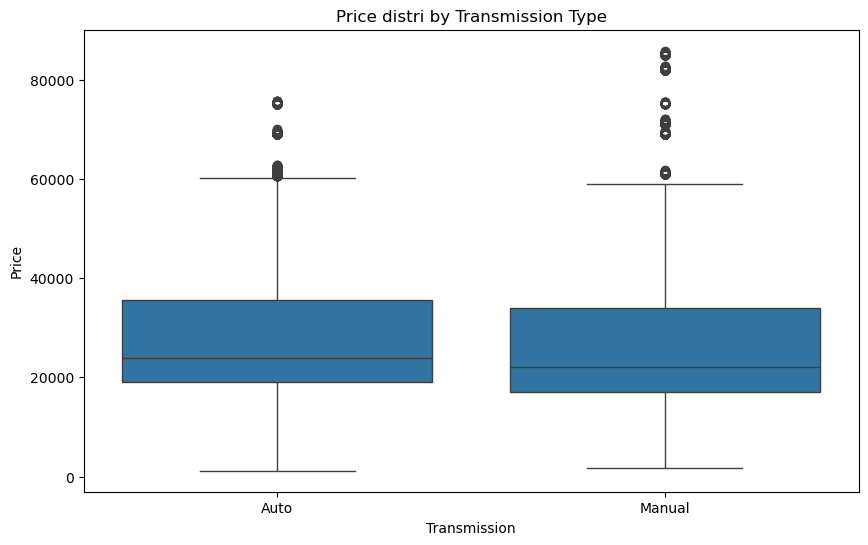

In [24]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Transmission",y='Price ($)', data=df1)
plt.title("Price distri by Transmission Type")
plt.ylabel("Price")

In [25]:
print("IQR:")
df1.groupby("Transmission")["Price ($)"].quantile(0.75).sub(df1.groupby("Transmission")["Price ($)"].quantile(0.25))

IQR:


Transmission
Auto      16500.0
Manual    17000.0
Name: Price ($), dtype: float64

Q: What is the distribution of car prices across different regions?

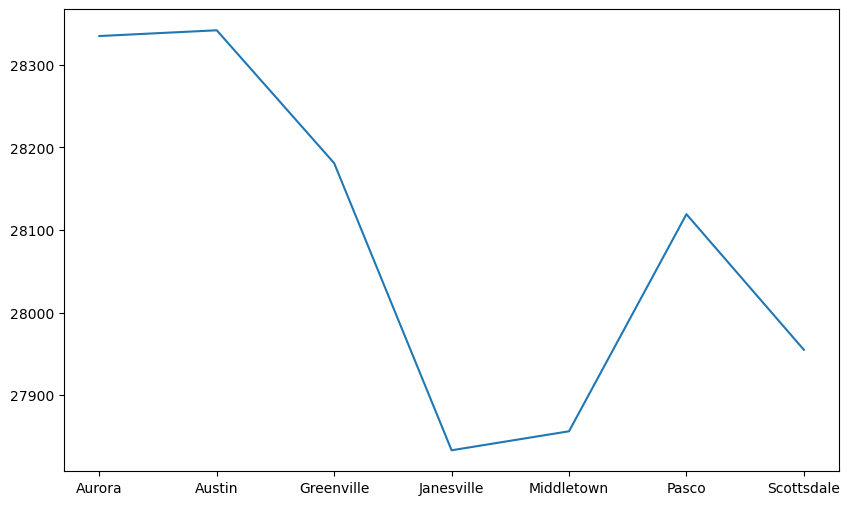

In [26]:
plt.figure(figsize=(10,6))
plt.plot(df1.groupby('Dealer_Region')['Price ($)'].mean())

Q: What is the distribution of cars based on body styles?

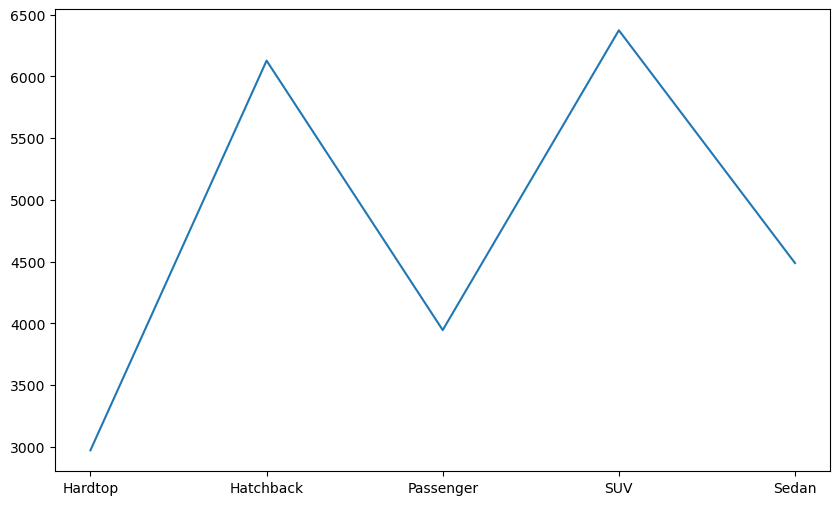

In [27]:
plt.figure(figsize=(10,6))
plt.plot(df1.groupby("Body Style")["Model"].count())

Q: How does the average selling price of cars vary by customer gender and annual income?

In [28]:
df1.groupby(["Gender","Annual Income"])["Price ($)"].mean()

Gender  Annual Income
Female  13500            28132.038732
        106000           46001.000000
        121000           20000.000000
        190000           19001.000000
        211000           51000.000000
                             ...     
Male    6600000          39000.000000
        6800000          15000.000000
        7650000          21000.000000
        8000000          85000.000000
        11200000         26001.000000
Name: Price ($), Length: 3442, dtype: float64

Q: What is the distribution of car prices by region, and how does the number of cars sold vary by region?


Text(0.5, 1.0, 'distribution of car prices by region')

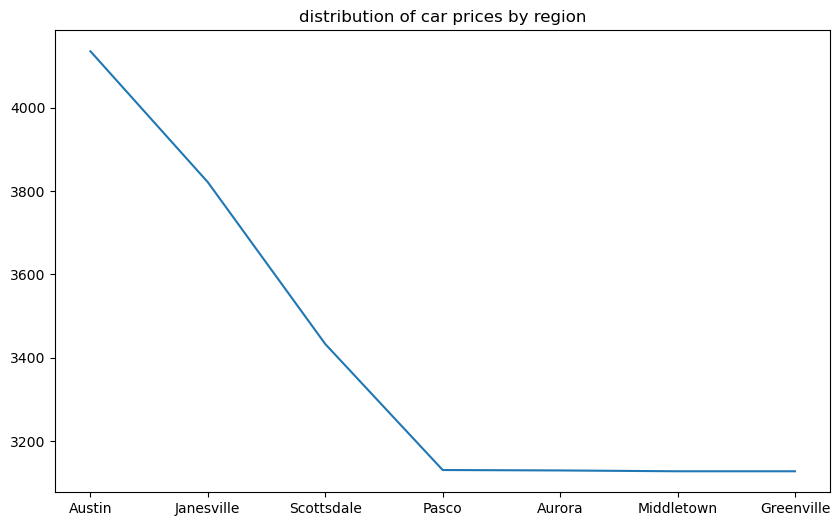

In [29]:
plt.figure(figsize=(10,6))
plt.plot(df1['Dealer_Region'].value_counts())
plt.title("distribution of car prices by region")

Text(0.5, 1.0, 'number of cars sold vary by region')

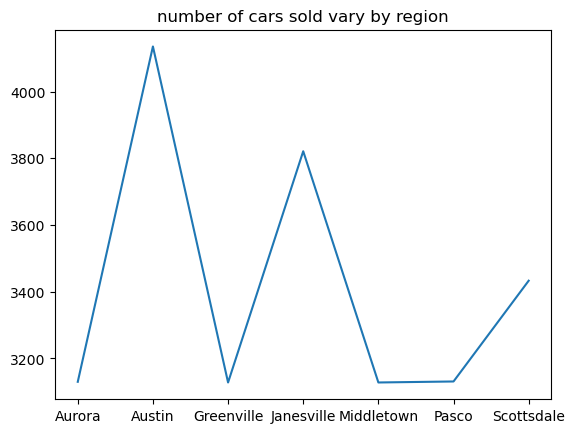

In [30]:
plt.plot(df1.groupby("Dealer_Region")["Car_id"].count())
plt.title("number of cars sold vary by region")

Q: How does the average car price differ between cars with different engine sizes?

In [31]:
df1.groupby("Engine")["Price ($)"].mean()

Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64

Q: How do car prices vary based on the customer’s annual income bracket?

In [32]:
df1['Income_Bracket'] = pd.cut(df1['Annual Income'], 
                              bins=5,
                              labels=['L1', 'L2', 'L3', 'L4', 'L5'])

df1.groupby('Income_Bracket')['Price ($)'].mean()

C:\Users\Tatha\AppData\Local\Temp\ipykernel_156320\3815911667.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1.groupby('Income_Bracket')['Price ($)'].mean()


Income_Bracket
L1    28044.351311
L2    29211.227862
L3    27736.745763
L4    40333.333333
L5    26001.000000
Name: Price ($), dtype: float64

Q: What are the top 5 car models with the highest number of sales, and how does their price distribution look

<Axes: xlabel='Model', ylabel='Price ($)'>

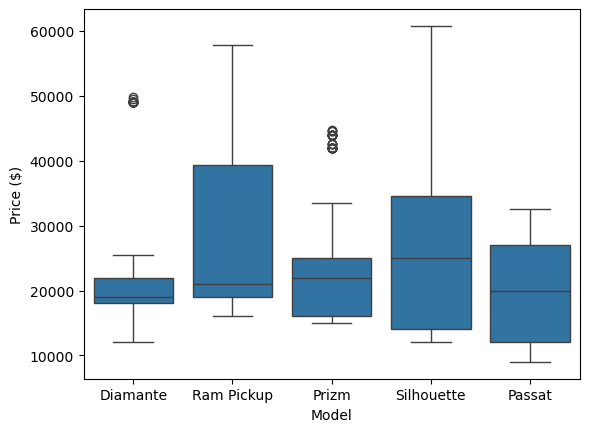

In [33]:
sns.boxplot(x='Model', y='Price ($)', data=df1[df1['Model'].isin(df1['Model'].value_counts().head().index)])

Q: How does car price vary with engine size across different car colors, and which colors have the highest price
variation?

<Axes: xlabel='Engine', ylabel='Price ($)'>

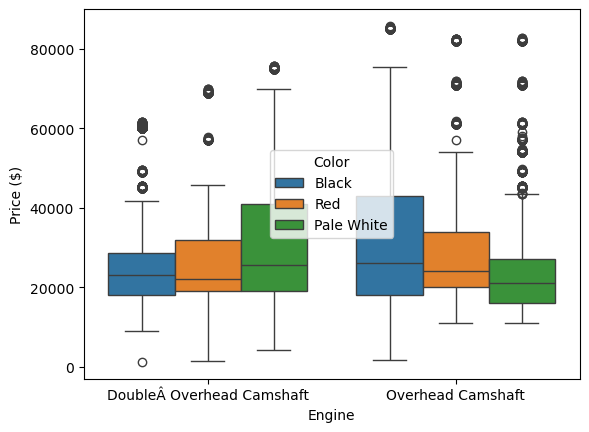

In [34]:
sns.boxplot(x='Engine', y='Price ($)', hue='Color', data=df1)

In [35]:
df1.groupby('Color')['Price ($)'].std().sort_values(ascending=False)

Color
Red           15519.360962
Black         15286.065976
Pale White    14077.346859
Name: Price ($), dtype: float64

Q:  Is there any seasonal trend in car sales based on the date of sale?

<Axes: xlabel='Month'>

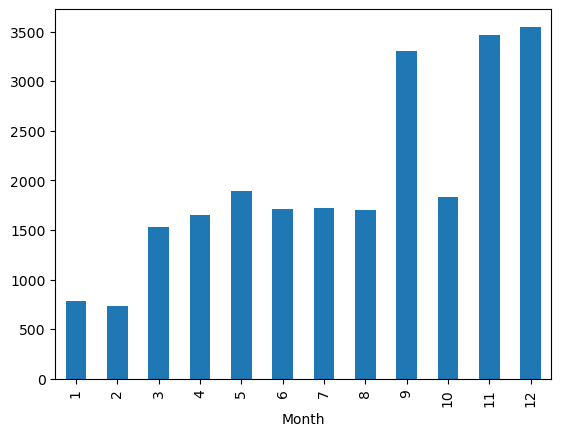

In [36]:
df1['Date'] = pd.to_datetime(df1['Date'])
df1['Month'] = df1['Date'].dt.month
df1['Month'].value_counts().sort_index().plot(kind='bar')

Q: How does the car price distribution change when considering different combinations of body style and
transmission type?

<Axes: xlabel='Body Style', ylabel='Price ($)'>

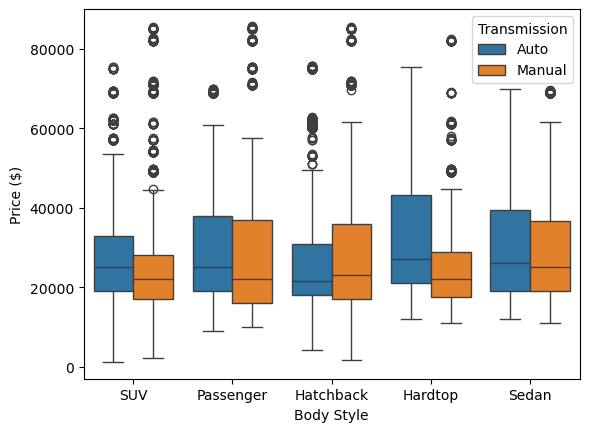

In [37]:
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=df1)

Q: What is the correlation between car price, engine size, and annual income of customers, and how do these
features interact

               Price ($)  Annual Income
Price ($)       1.000000       0.012065
Annual Income   0.012065       1.000000


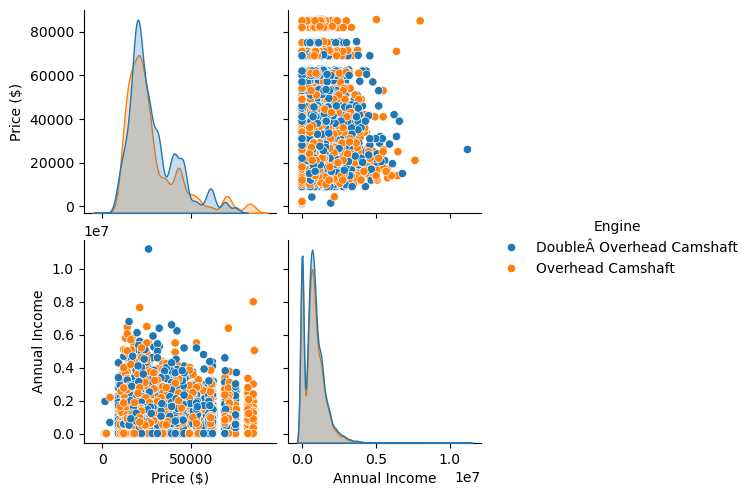

In [38]:
print(df1[['Price ($)', 'Annual Income']].corr())

sns.pairplot(df1[['Price ($)', 'Annual Income', 'Engine']], hue='Engine')


Q: How does the average car price vary across different car models and engine types?

In [39]:
df1.groupby(['Model', 'Engine'])['Price ($)'].mean().unstack()

Engine,DoubleÂ Overhead Camshaft,Overhead Camshaft
Model,,
3-Sep,37986.380117,NaN
3000GT,22764.326923,21770.659864
300M,21394.888889,NaN
323i,16744.632287,21038.162162
328i,21069.149606,38676.177215
...,...,...
Viper,32118.479167,26052.375000
Voyager,22066.026316,33995.678322
Windstar,25145.636364,17100.272727


In [40]:
df1.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region,Income_Bracket,Month
0,C_CND_000001,2022-01-02,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown,L1,1
1,C_CND_000002,2022-01-02,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora,L1,1
2,C_CND_000003,2022-01-02,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville,L1,1
3,C_CND_000004,2022-01-02,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco,L1,1
4,C_CND_000005,2022-01-02,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville,L1,1


# EDA-3

In [41]:
df=pd.read_csv("amazon.csv")
df['rating_count'] = df['rating_count'].str.replace(",","").astype(float)
df['actual_price'] = df['actual_price'].str.replace(r"[,₹]","",regex=True).astype(float)
df['discounted_price'] = df['discounted_price'].str.replace(r"[,₹]","",regex=True).astype(float)
df['discount_percentage'] = df['discount_percentage'].str.replace(r"[,%]","",regex=True).astype(float)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

Q: What is the average rating for each product category?

In [42]:
df.groupby("category")["rating"].mean()

category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           4.050000
                                                                                                                            ...   
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens        4.250000
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSu

Q: What are the top rating_count products by category?

In [43]:
df.groupby("category")["rating_count"].max().sort_index(ascending=False)

category
Toys&Games|Arts&Crafts|Drawing&PaintingSupplies|ColouringPens&Markers                                                     15867.0
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|StickBallpointPens           4308.0
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens     5719.0
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens      6199.0
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens         5792.0
                                                                                                                           ...   
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                            7352.0
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophone

Q: What is the distribution of discounted prices vs. actual prices?

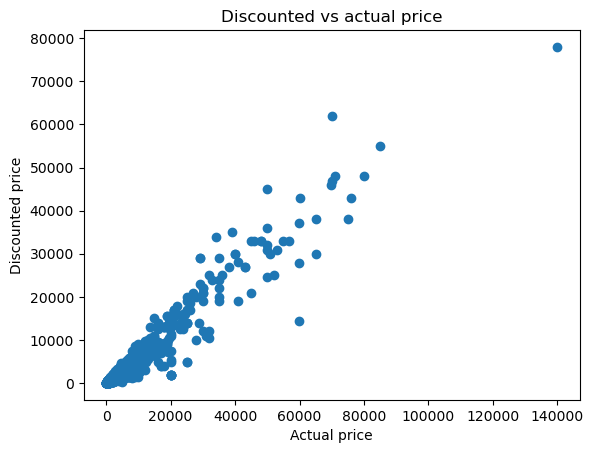

In [44]:
plt.scatter(df['actual_price'], df['discounted_price'])
plt.xlabel('Actual price')
plt.ylabel('Discounted price')
plt.title('Discounted vs actual price')
plt.show()

Q: How does the average discount percentage vary across categories?

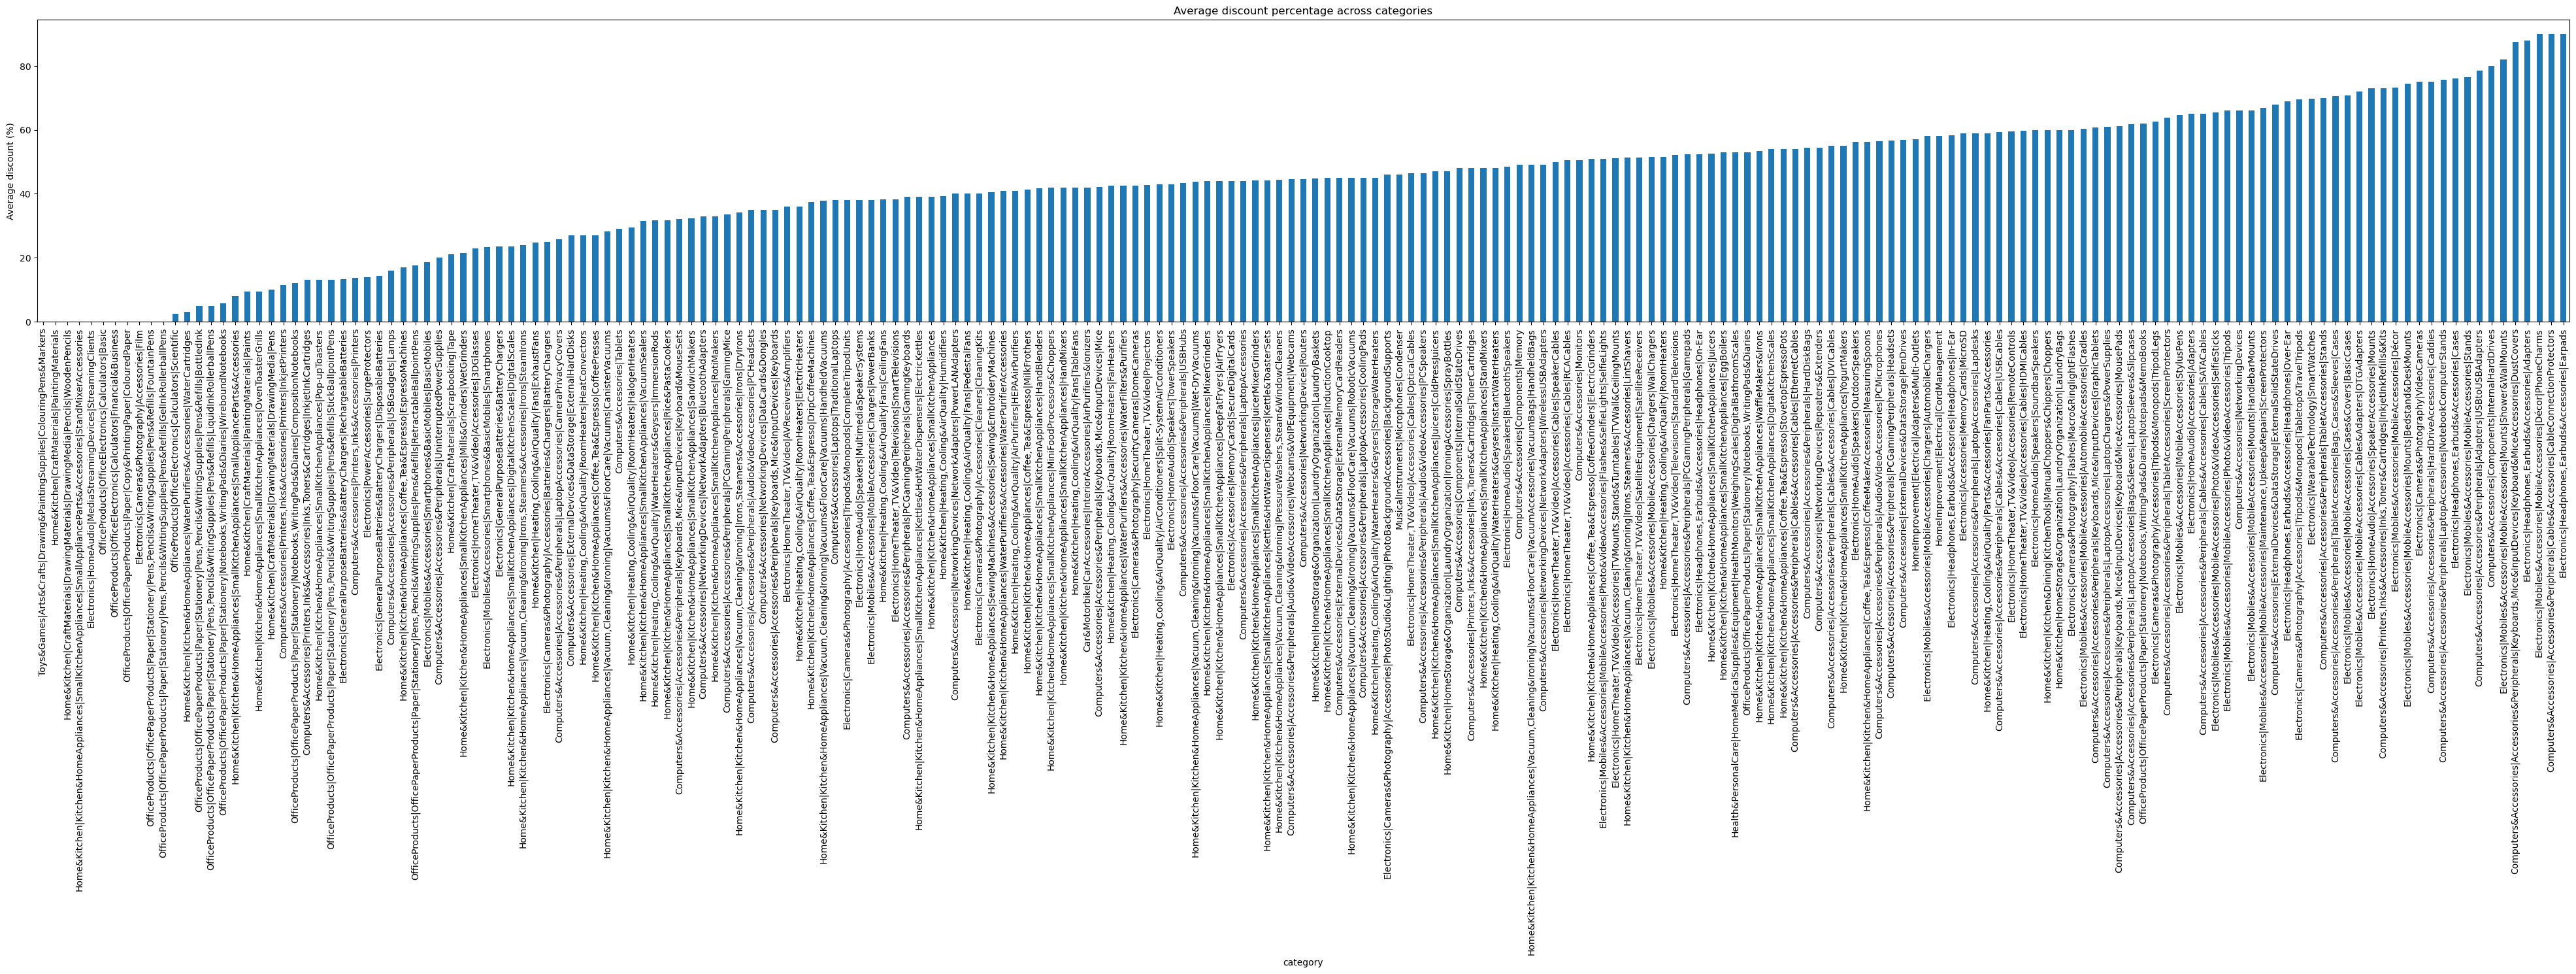

In [45]:
avg_disc=df.groupby("category")["discount_percentage"].mean().sort_values()
avg_disc.plot(kind="bar",figsize=(50,6))
plt.ylabel('Average discount (%)')
plt.title('Average discount percentage across categories')
plt.show()

Q: What are the most popular product names?

In [46]:
df.groupby("product_name")["rating_count"].sum().sort_values(ascending=False).head(10)

product_name
AmazonBasics Flexible Premium HDMI Cable (Black, 4K@60Hz, 18Gbps), 3-Foot                                                                  853945.0
Amazon Basics High-Speed HDMI Cable, 6 Feet - Supports Ethernet, 3D, 4K video,Black                                                        426973.0
Amazon Basics High-Speed HDMI Cable, 6 Feet (2-Pack),Black                                                                                 426973.0
JBL C100SI Wired In Ear Headphones with Mic, JBL Pure Bass Sound, One Button Multi-function Remote, Angled Buds for Comfort fit (Black)    385177.0
boAt Bassheads 100 in Ear Wired Earphones with Mic(Furious Red)                                                                            363713.0
boAt Bassheads 100 in Ear Wired Earphones with Mic(Taffy Pink)                                                                             363713.0
boAt BassHeads 100 in-Ear Wired Headphones with Mic (Black)                                        

Q: What are the most popular product keywords?

In [47]:
from collections import Counter
import re

words = df['product_name'].str.lower().str.replace('[^a-z0-9 ]','', regex=True).str.split()
counter = Counter([w for lst in words.dropna() for w in lst])
counter.most_common(20)  # top 20 keywords


[('with', 751),
 ('for', 673),
 ('black', 468),
 ('cable', 401),
 ('usb', 390),
 ('and', 330),
 ('charging', 246),
 ('to', 218),
 ('fast', 210),
 ('c', 188),
 ('smart', 172),
 ('white', 155),
 ('type', 149),
 ('tv', 145),
 ('compatible', 142),
 ('data', 135),
 ('1', 135),
 ('hd', 129),
 ('3', 119),
 ('in', 118)]

Q: What are the most popular product reviews?

In [48]:
df.sort_values("rating_count",ascending=False)["review_title"].head(10)

12     It's quite good and value for money,Works well...
65     It's quite good and value for money,Works well...
47     It's quite good and value for money,Works well...
684    It's quite good and value for money,Works well...
400    Best value for money,HEAD PHONE POUCH NOT RECE...
352    Best value for money,HEAD PHONE POUCH NOT RECE...
584    Best value for money,HEAD PHONE POUCH NOT RECE...
370    Best phone for below normal use,Good mobile fo...
371    Best phone for below normal use,Good mobile fo...
473    Best phone for below normal use,Good mobile fo...
Name: review_title, dtype: object

Q: What is the correlation between discounted_price and rating?

<Axes: >

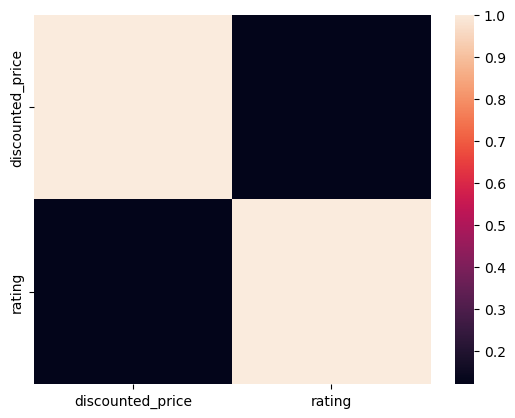

In [49]:
cols=df[["discounted_price","rating"]].columns
corr_matrix=df[cols].corr()
sns.heatmap(corr_matrix)

Q: What are the Top 5 categories based on the highest ratings?

In [50]:
df.groupby("category")["rating"].mean().sort_values(ascending=False).head(5)

category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
OfficeProducts|OfficeElectronics|Calculators|Basic                          4.5
Name: rating, dtype: float64

In [51]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43.0,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90.0,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53.0,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61.0,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


Q:  Identify any potential areas for improvement or optimization based on the data analysis.

In [52]:
cols = ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']
for col in cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [53]:
df_clean = df.dropna(subset=cols)

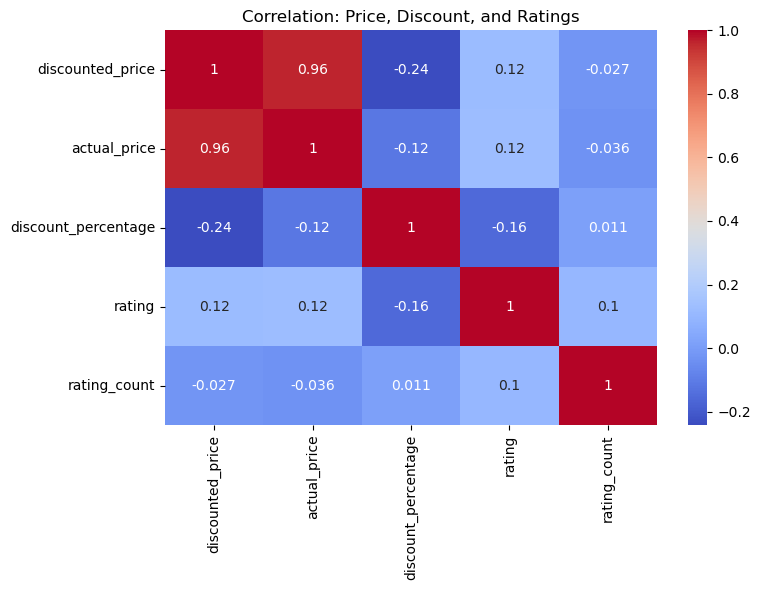

In [54]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_clean[cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation: Price, Discount, and Ratings')
plt.tight_layout()

Observations:
There is a weak negative correlation (-0.16) between discount_percentage and rating. This indicates that increasing the discount magnitude does not lead to higher customer ratings.  

Both actual_price and discounted_price have a negligible positive correlation with rating. This suggests that customers are not necessarily happier with more expensive products, nor are they significantly happier with cheaper ones.

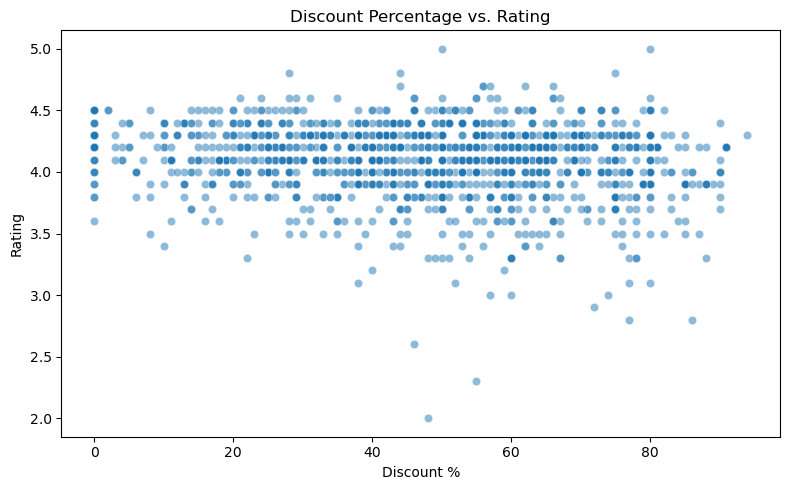

In [55]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='discount_percentage', y='rating', data=df_clean, alpha=0.5)
plt.title('Discount Percentage vs. Rating')
plt.xlabel('Discount %')
plt.ylabel('Rating')
plt.tight_layout()

Observations:  
The data points are scattered widely without a clear upward trend. We cannot predict a better rating simply because a product is 50% or 70% off.  

Products with massive discounts (e.g., >70%) shows a wider variance in ratings. This implies that while the low price attracts buyers, the product quality might not match expectations.

# EDA -4

Q: Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do
the needful.

In [56]:
df=pd.read_csv("spotify.csv")

df.isna().value_counts()

Artist  Track Name  Popularity  Duration (ms)  Track ID
False   False       False       False          False       440
Name: count, dtype: int64

In [57]:
df.duplicated().value_counts()

False    413
True      27
Name: count, dtype: int64

In [58]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

Q: What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.

Text(0, 0.5, 'no.of tracks')

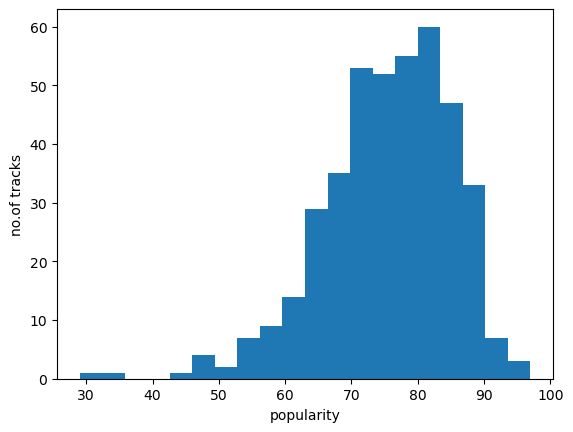

In [59]:
plt.hist(df["Popularity"],bins=20)
plt.xlabel("popularity")
plt.ylabel("no.of tracks")

Q: Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.

Text(0, 0.5, 'Duration')

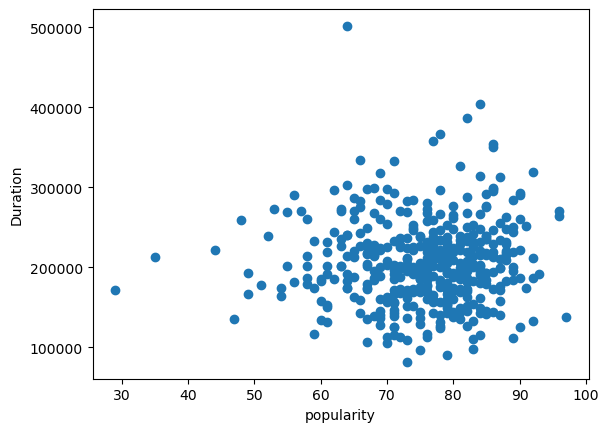

In [60]:
plt.scatter(df["Popularity"],df["Duration (ms)"])
plt.xlabel("popularity")
plt.ylabel("Duration")

Q: Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.

In [61]:
df["Artist"].value_counts(ascending=False)
# Drake has highest number of tracks

Artist
Drake             17
Eminem            11
Flo Rida          10
Ludacris          10
Timbaland         10
                  ..
Arizona Zervas     1
Fivio Foreign      1
Pressa             1
David Guetta       1
Diddy              1
Name: count, Length: 115, dtype: int64

<Axes: xlabel='count', ylabel='Artist'>

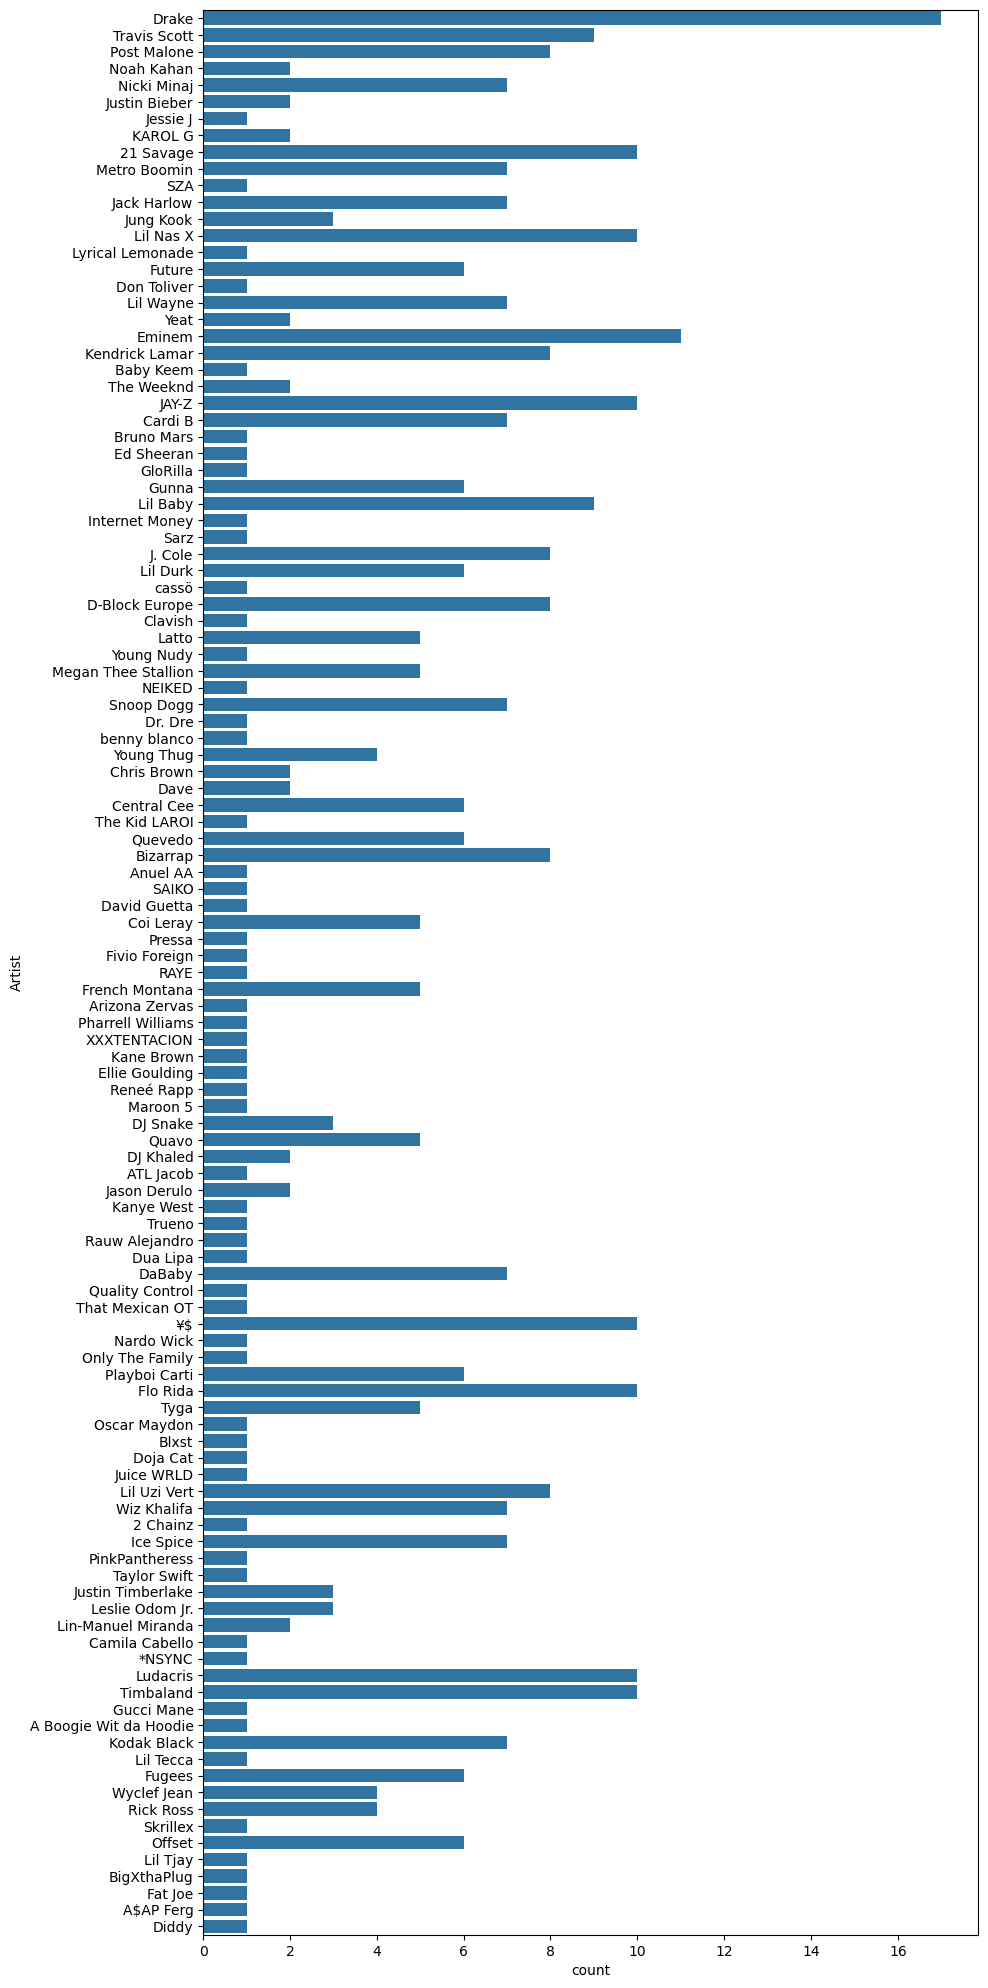

In [62]:
plt.figure(figsize=(10, 25))
sns.countplot(y="Artist",data=df)

Q: What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

In [63]:
df_p=df.sort_values(by="Popularity")
df_p[["Artist","Track Name","Popularity"]].head()

,Artist,Track Name,Popularity
207,Pressa,Attachments (feat. Coi Leray),29
231,Justin Bieber,Intentions,35
413,French Montana,Splash Brothers,44
225,Lil Baby,On Me - Remix,47
407,Wyclef Jean,911 (feat. Mary J. Blige),48


Q: Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and
display the average popularity for each artist.


In [64]:
mp=df.groupby("Artist")["Popularity"].mean().sort_values(ascending=False).head()
mp=mp.to_frame()
mp

,Popularity
Artist,
cassö,92.000000
Trueno,89.000000
David Guetta,87.000000
Travis Scott,86.555556
¥$,85.100000


Q: For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.


In [65]:
df[df["Artist"].isin(mp.index)].sort_values("Popularity",ascending=False).groupby("Artist").head(1)[["Artist","Track Name","Popularity"]]

,Artist,Track Name,Popularity
260,¥$,CARNIVAL,96
30,Travis Scott,FE!N (feat. Playboi Carti),93
140,cassö,Prada,92
241,Trueno,Mamichula - con Nicki Nicole,89
200,David Guetta,Baby Don't Hurt Me,87


Q: Visualize relationships between multiple numerical variables simultaneously using a pair plot.


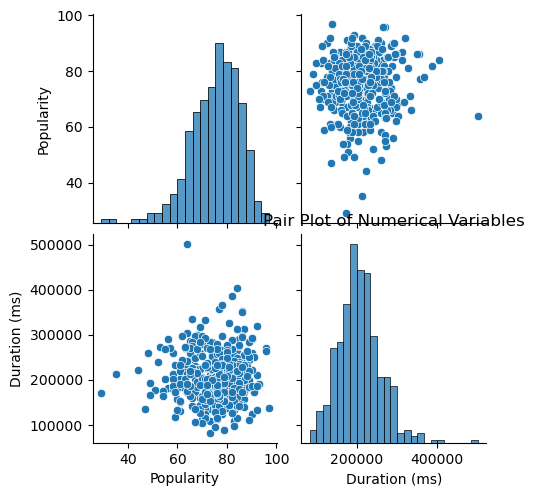

In [66]:
sns.pairplot(df[['Popularity', 'Duration (ms)']])
plt.title('Pair Plot of Numerical Variables')
plt.show()

Q: Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.


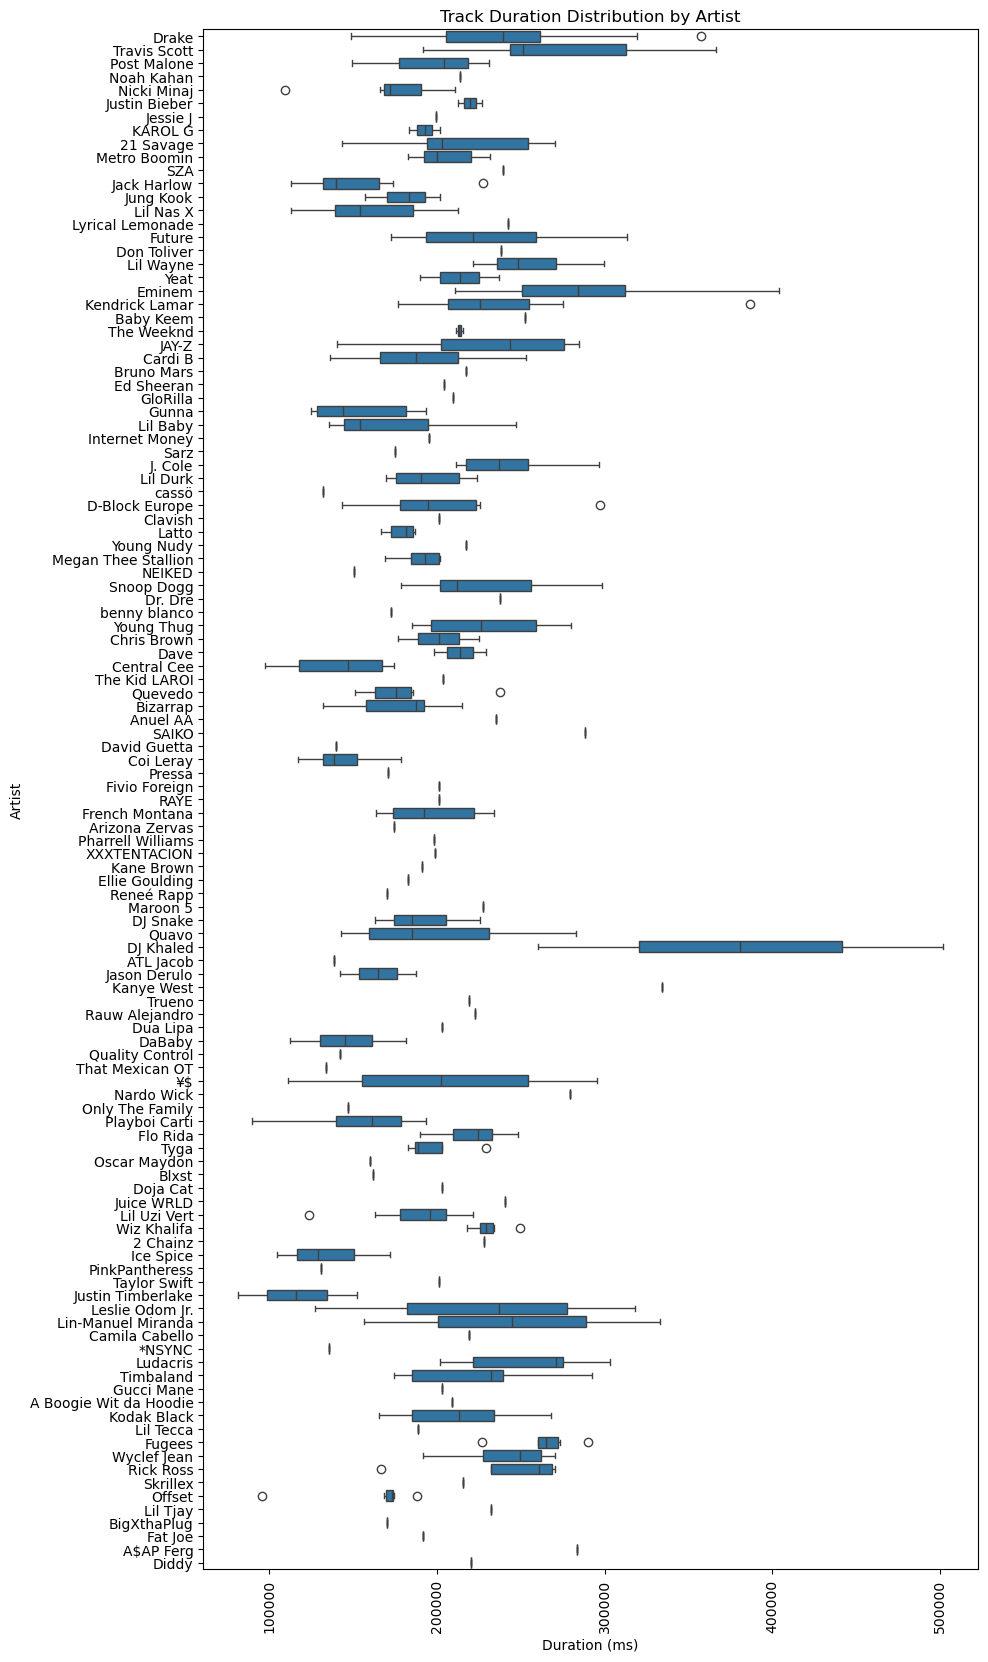

In [67]:
plt.figure(figsize=(10, 20))
sns.boxplot(data=df, y='Artist', x='Duration (ms)')
plt.xticks(rotation=90)
plt.title('Track Duration Distribution by Artist')
plt.show()

Q: How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

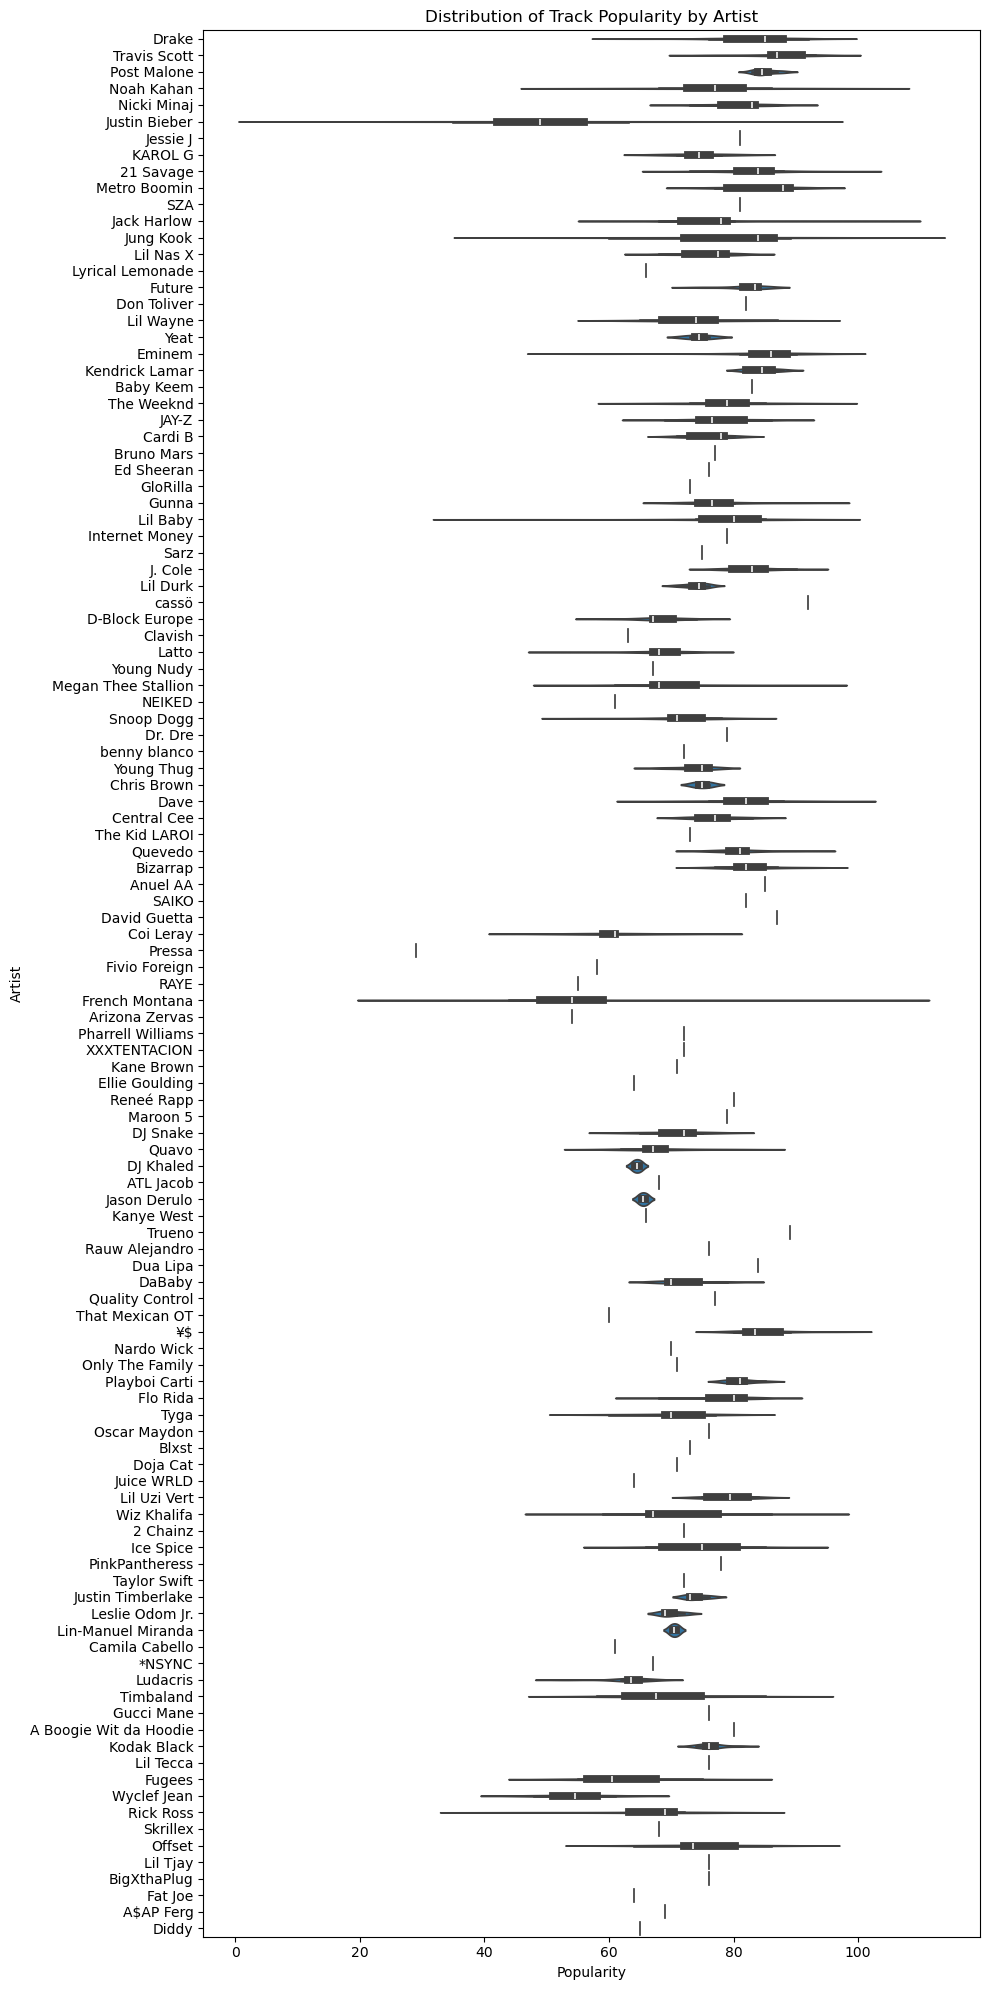

In [68]:
plt.figure(figsize=(10, 20))
sns.violinplot(data=df, y='Artist', x='Popularity')
plt.title('Distribution of Track Popularity by Artist')
plt.tight_layout()
plt.show()